# Regresión con datos sintéticos

Aplica regresión lineal a los datos sintéticos que se encuentran divididos en los archivos de entrenamiento **x_entrenamiento.csv** y **y_entrenamiento.csv** y los de prueba **x_prueba.csv**  y **y_rueba.csv**
Estos datos fueron contaminados con ruido gaussiano con media igual a 0 y desviación estándar
igual a 0.05. 

Realiza lo siguiente:

In [365]:
# Comando para visualizar los archivos que tengo en la carpeta de Tarea3
!ls

03_regresion_clasificacion_lineal.pdf  housing.data.5
Codigos_Regresion_Lineal	       Predicción de juegos.ipynb
housing.data			       Predicción de precios de casas.ipynb
housing.data.1			       regl_data
housing.data.2			       regl_data.zip
housing.data.3			       Regresión_Dato_Sintéticos.ipynb
housing.data.4


In [366]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
from IPython.display import display


In [367]:
x_train = pd.read_csv("regl_data/x_train.csv",header=None)
y_train = pd.read_csv("regl_data/y_train.csv",header=None)

print "Dimensiones del x_train:"
display(x_train.shape)

print "Dimensiones del y_train:"
display(y_train.shape)

print "x_train"
display(x_train.head())

print "y_train"
display (y_train.head())

Dimensiones del x_train:


(200, 2)

Dimensiones del y_train:


(200, 1)

x_train


,0,1
0,-1.913570,2.032600
1,1.817693,2.787149
2,-1.287542,1.051852
3,1.091132,2.287752
4,-0.952672,2.885976


y_train


,0
0,0.619935
1,-0.640359
2,1.874947
3,-0.365971
4,0.623855


## Estadisticos del *data_set* de entrenamiento: 


In [368]:
display ("Estadisticos del data_set de entrenamiento")
display (x_train.describe())

display ("Estadisticos del data_set de entrenamiento")
display (y_train.describe())

'Estadisticos del data_set de entrenamiento'

,0,1
count,200.000000,200.000000
mean,-0.040296,1.918557
std,1.287247,0.721394
min,-1.928379,0.550237
25%,-1.296099,1.333912
50%,0.496013,1.932160
75%,1.154615,2.538318
max,1.912665,3.129935


'Estadisticos del data_set de entrenamiento'

,0
count,200.000000
mean,0.528573
std,1.047393
min,-1.913288
25%,-0.225868
50%,0.631330
75%,1.222403
max,2.661427


Grafica los datos de entrenamiento y de prueba y comenta brevemente acerca de cómo están
distribuidos.

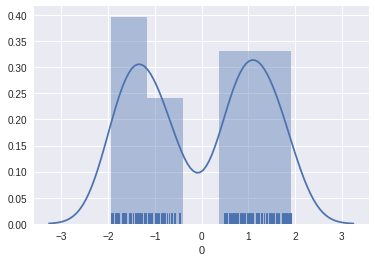

In [369]:

sns.distplot(x_train[0], hist=True, rug=True);

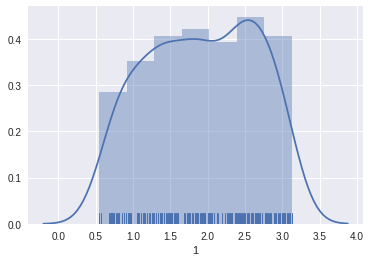

In [370]:
sns.distplot(x_train[1], hist=True, rug=True);

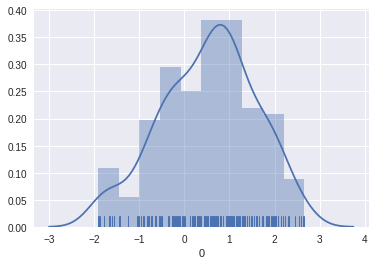

In [371]:
sns.distplot(y_train[0], hist=True, rug=True);

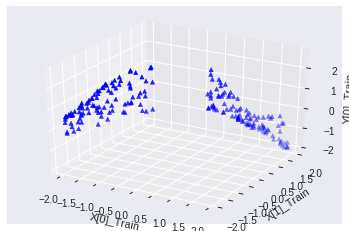

In [372]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n = 200
xs = x_train[0]
ys = x_train[0]
zs = y_train[0]
ax.scatter(xs, ys, zs, c='b', marker='^')

ax.set_xlabel('X[0]_Train')
ax.set_ylabel('X[1]_Train')
ax.set_zlabel('Y[0]_Train')

plt.show()

# Visualizacion y carga de los datos de prueba:

In [373]:
x_test = pd.read_csv("regl_data/x_test.csv",header=None)
y_test = pd.read_csv("regl_data/y_test.csv",header=None)

print "Dimensiones del x_test:"
display(x_test.shape)

print "Dimensiones del y_test:"
display(y_test.shape)


print "x_test "
display(x_test.head())
print "y_test:"
display(y_test.head())

Dimensiones del x_test:


(200, 2)

Dimensiones del y_test:


(200, 1)

x_test 


,0,1
0,0.522360,2.641996
1,-1.556105,1.001378
2,1.578210,0.965343
3,-1.796698,1.007622
4,-1.778407,2.337267


y_test:


,0
0,0.489523
1,1.051965
2,-1.055267
3,0.492597
4,0.660550


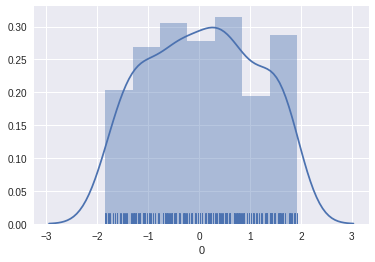

In [374]:
sns.distplot(x_test[0], hist=True, rug=True)

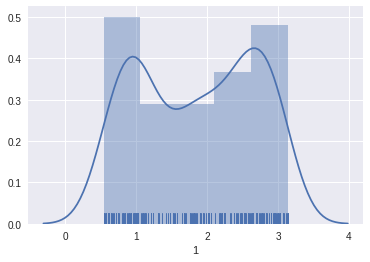

In [375]:
sns.distplot(x_test[1], hist=True, rug=True)

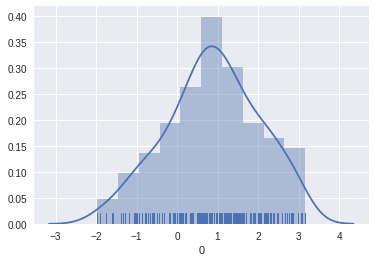

In [376]:
sns.distplot(y_test[0], hist=True, rug=True)

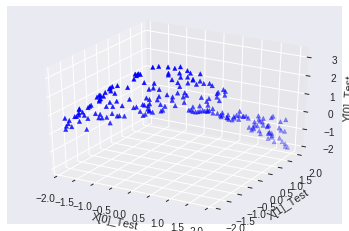

In [377]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n = 200
xs = x_test[0]
ys = x_test[0]
zs = y_test[0]
ax.scatter(xs, ys, zs, c='b', marker='^')

ax.set_xlabel('X[0]_Test')
ax.set_ylabel('X[1]_Test')
ax.set_zlabel('Y[0]_Test')

plt.show()

# b. Modelo utilizando implentación propia:

Se implementara el modelo de una regresión lineal de la forma $f(x)=\Theta_{0} + \Theta_{1}*x_{1}+ \Theta_{2}*x_{2}$

In [378]:
def polynomial_expansion(X, degree):
    phi_X = X
    for i in range(degree - 1):
        powerX = np.power(X, i + 2)
        phi_X = np.column_stack((phi_X, powerX))
    return phi_X

In [379]:
def MyLinearRegression(X_train,y_train):
    # Para encontrar pesos por mínimos cuadrados, theta_ml = (XT X)-1 XT y
    # (XT X)
    XTX = np.dot(X_train.T, X_train)
    # (XT X)-1
    XTX_inv = np.linalg.inv(XTX)
    # XT y
    XTy = np.dot(X_train.T, y_train)
    #theta_ml = (XT X)-1 XT y
    theta_ml = np.dot(XTX_inv, XTy)
    return theta_ml

In [380]:
# Definir procedimiento.
x_train_2 = x_train.as_matrix()
x_train_2 = np.insert(x_train_2, 0,1 ,axis=1)

x_test_2 = x_test.as_matrix()
x_test_2 = np.insert(x_test_2, 0,1 ,axis=1)

# Se obienen los párametros de Theta.
theta_ml = MyLinearRegression(x_train_2,y_train)
theta_ml =theta_ml.reshape(3,)

# Se obitne el valor para y^ 
y_train_hat= (np.sum(x_train_2*theta_ml,axis=1))
y_test_hat = (np.sum(x_test_2*theta_ml,axis=1))


print ("Los párametros encontrados usando el estimador de máxima verosimilitud son: ")
print  (theta_ml[0],theta_ml[1],theta_ml[2])

Los párametros encontrados usando el estimador de máxima verosimilitud son: 
(1.0833295824645832, -0.5461849484233422, -0.30062493084821673)


# Error cuadrático medio para los datos de entrenamiento y de prueba.

In [381]:
y_train_hat = y_train_hat.reshape(200,1)
y_test_hat = y_test_hat.reshape(200,1) 

# Se inspecciona la suma de los cuadrados del error (SSE)
# entre las salidas del modelo y las deseadas
sse_train = (np.square(y_train - y_train_hat).sum())
sse_test = (np.square(y_test- y_test_hat).sum())

# Se calcula error promedio MSE = SSE / N de entrenamiento y validación
mse_train = sse_train / x_train_2.shape[0]
mse_test= sse_test / x_test_2.shape[0]

print ("===El error promedio para los datos de entrenamiento es el siguiente===")
print mse_train[0]

print ("\n")

print ("===El error promedio para los datos de validación es el siguiente===")
print mse_test[0]

===El error promedio para los datos de entrenamiento es el siguiente===
0.589649709897


===El error promedio para los datos de validación es el siguiente===
0.898730729128


# Modelo utilizando scikit-learn:

In [382]:
import numpy as np
from sklearn import datasets, linear_model

# Creamos un objeto de la clase LinearRegression
regr = linear_model.LinearRegression(fit_intercept=False)
# Entreando el modelo usando el data_set de entrenamiento.
regr.fit(x_train_2, y_train)

print ("Los párametros encontrados usando el estimador de máxima verosimilitud son: ")
print  (regr.coef_[0][0],regr.coef_[0][1],regr.coef_[0][2])


Los párametros encontrados usando el estimador de máxima verosimilitud son: 
(1.083329582464579, -0.54618494842334275, -0.30062493084821446)


# Error cuadrático medio para los datos de entrenamiento y de prueba.         (scikit-learn)

In [383]:
y_train_hat_sk = regr.predict(x_train_2)
y_test_hat_sk = regr.predict(x_test_2)


sse_train_sk = (np.square(y_train - y_train_hat_sk).sum())/x_train_2.shape[0]
sse_test_sk = (np.square(y_test- y_test_hat_sk).sum())/x_test_2.shape[0]

print ("===El error promedio para los datos de entrenamiento es el siguiente===")
print sse_train_sk[0]

print ("\n")

print ("===El error promedio para los datos de validación es el siguiente===")
print sse_test_sk[0]

===El error promedio para los datos de entrenamiento es el siguiente===
0.589649709897


===El error promedio para los datos de validación es el siguiente===
0.898730729128


# c.- Utilizando expansión de base polinomial y norma $l_{2}$.

In [384]:
def polynomial_expansion_2(X, degree):
    phi_X = X
    for i in range(degree - 1):
        powerX = np.power(X, i + 2)
        phi_X = np.column_stack((phi_X, powerX))
    return phi_X

In [385]:
def reggresion_L2(X_train,degree=1,lambda_const=0.01):
    ones_train = np.ones(X_train.shape[0])
    phi_X_train = np.column_stack((ones_train, X_train))
    phi_X_train = polynomial_expansion_2(phi_X_train,degree)
    regularizer = lambda_const * np.identity(phi_X_train.shape[1])
    theta_map = np.dot(np.linalg.inv(regularizer + np.dot(np.transpose(phi_X_train), phi_X_train)),
                   np.dot(np.transpose(phi_X_train), y_train))
    return theta_map,phi_X_train


In [386]:
m_degree = 1
x_train_3_par = x_train.as_matrix()
theta_map, x_train_3= reggresion_L2(x_train_3_par,degree=m_degree)

print ("Los párametros encontrados usando el estimador de máxima verosimilitud son: ")
print  (theta_map)

Los párametros encontrados usando el estimador de máxima verosimilitud son: 
[[ 1.08282322]
 [-0.54615367]
 [-0.30038856]]


In [387]:
y_train_hat_l2 = (np.sum(x_train_3*theta_map.T,axis=1))

y_train_hat_l2 = y_train_hat_l2.reshape(200,1)
sse_train = np.square(y_train - y_train_hat_l2).sum()


x_test_3 = x_test.as_matrix()
ones_train_test = np.ones(x_test_3.shape[0]) 
x_test_3 = polynomial_expansion(x_test_3,degree=m_degree)
x_test_3 = np.column_stack((ones_train_test, x_test_3))

y_test_hat_l2  = np.dot(x_test_3, theta_map)

y_test_hat_l2 = y_test_hat_l2.reshape(200,1)
sse_valid = np.square(y_test - y_test_hat_l2).sum()

# Se calcula error promedio MSE = SSE / N de entrenamiento y validación
mse_train_l2 = sse_train / x_train_3.shape[0]
mse_test_l2 = sse_valid / x_test_3.shape[0]

print ("===El error promedio para los datos de entrenamiento usando norma l2 es el siguiente===")
print mse_train_l2[0]

print ("\n")

print ("===El error promedio para los datos de validación usando norma l2 es el siguiente===")
print mse_test_l2[0]


===El error promedio para los datos de entrenamiento usando norma l2 es el siguiente===
0.589649741717


===El error promedio para los datos de validación usando norma l2 es el siguiente===
0.898834859455


 # Aplicando norma $l_{2}$ utilizando la libreria de scikit-learn:

In [388]:
from sklearn.linear_model import Ridge
import numpy as np 

X_train = x_train.as_matrix()
X_test = x_test.as_matrix()

phi_X_train = np.insert(X_train,0,1.0,axis=1)
phi_X_test= np.insert(X_test,0,1.0,axis=1)

clf=Ridge(alpha=0.01,fit_intercept=False)
clf.fit(phi_X_train,y_train) 

print ("Los párametros encontrados usando norma l2 son los siguientes") 
print clf.coef_

Los párametros encontrados usando norma l2 son los siguientes
[[ 1.08282322 -0.54615367 -0.30038856]]


In [389]:
y_train_hat_l2_sk = clf.predict(phi_X_train)
y_test_hat_l2_sk = clf.predict(phi_X_test)

sse_train_l2_sk = (np.square(y_train - y_train_hat_l2_sk).sum())/phi_X_train.shape[0]
sse_test_l2_sk = (np.square(y_test- y_test_hat_l2_sk).sum())/phi_X_test.shape[0]

print ("===El error promedio para los datos de entrenamiento es el siguiente===")
print sse_train_l2_sk[0]

print ("\n")

print ("===El error promedio para los datos de validación es el siguiente===")
print sse_test_l2_sk[0]

===El error promedio para los datos de entrenamiento es el siguiente===
0.589649741717


===El error promedio para los datos de validación es el siguiente===
0.898834859455


 # Implementando diferentes grados del polinomio al igual que diferentes valores de lambda para los datos de entrenamiento. 
 
 

In [390]:
def polynomial_expansion_2(X, degree):
    phi_X = X
    for i in range(degree - 1):
        powerX = np.power(X, i + 2)
        phi_X = np.column_stack((phi_X, powerX))
    return phi_X

In [391]:
def reggresion_L2(X_train,degree=1,lambda_const=0.01):
    ones_train = np.ones(X_train.shape[0])
    phi_X_train = np.column_stack((ones_train, X_train))
    phi_X_train = polynomial_expansion_2(phi_X_train,degree)
    regularizer = lambda_const * np.identity(phi_X_train.shape[1])
    theta_map = np.dot(np.linalg.inv(regularizer + np.dot(np.transpose(phi_X_train), phi_X_train)),
                   np.dot(np.transpose(phi_X_train), y_train))
    return theta_map,phi_X_train

(200, 3)
Los parametros obtenidos usando norma l2 con lamba =0.01000 
Utilizando expansión del polinomio de grado=1
[[ 1.08282322]
 [-0.54615367]
 [-0.30038856]]
El error promedio es : 0.58965


(200, 6)
Los parametros obtenidos usando norma l2 con lamba =0.01000 
Utilizando expansión del polinomio de grado=2
[[ 1.04857349]
 [-0.61599255]
 [-0.23303858]
 [ 1.04857349]
 [-0.61640318]
 [-0.03074179]]
El error promedio es : 0.18034


(200, 9)
Los parametros obtenidos usando norma l2 con lamba =0.01000 
Utilizando expansión del polinomio de grado=3
[[ 0.67033232]
 [-0.76796321]
 [-0.01120842]
 [ 0.67033232]
 [-0.61684911]
 [-0.16650632]
 [ 0.67033232]
 [ 0.06555437]
 [ 0.02413643]]
El error promedio es : 0.17371


(200, 12)
Los parametros obtenidos usando norma l2 con lamba =0.01000 
Utilizando expansión del polinomio de grado=4
[[ 0.44783679]
 [-0.76870995]
 [ 0.63046668]
 [ 0.44783679]
 [-0.62655186]
 [-0.78283268]
 [ 0.44783679]
 [ 0.06567656]
 [ 0.26490305]
 [ 0.44783679]
 [ 0.00261823

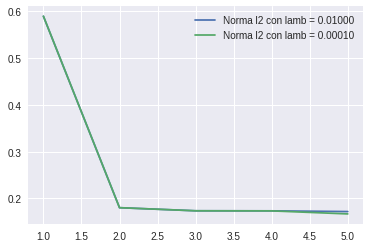

In [392]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

lambdas = [0.01,0.0001]
for lamb in lambdas:
    Iteracion=[]
    MSE = []
    for m_degree in range(1,6):
        #print m_degree
        X_train = x_train.as_matrix()    
        theta_map, X_train= reggresion_L2(X_train,degree=m_degree,lambda_const=lamb)
        print X_train.shape
        print ("================================================================")
        print ("Los parametros obtenidos usando norma l2 con lamba =%.5f " %lamb)
        print ("Utilizando expansión del polinomio de grado=%i" %m_degree)
        print (theta_map)
        y_train_hat_l2 = (np.sum(X_train*theta_map.T,axis=1))
        y_train_hat_l2 = y_train_hat_l2.reshape(200,1)
        sse_train = np.square(y_train - y_train_hat_l2).sum()
        mse_train_l2 = sse_train / X_train.shape[0]
        print ("El error promedio es : %.5f" %mse_train_l2)
        print ("\n")
        print ("================================================================")
        Iteracion.append(m_degree)
        MSE.append(mse_train_l2[0]) 
    #print Iteracion
    #print MSE
    plt.plot(Iteracion, MSE,label='Norma l2 con lamb = %.5f' %lamb)
ax.legend()
plt.show()


 # Implementando diferentes grados del polinomio al igual que diferentes valores de lambda para los datos de prueba. 

(200, 3)
Los parametros obtenidos usando norma l2 con lamba =0.01000 
Utilizando expansión del polinomio de grado=1
[[ 1.08282322]
 [-0.54615367]
 [-0.30038856]]
El error promedio es : 0.89883


(200, 6)
Los parametros obtenidos usando norma l2 con lamba =0.01000 
Utilizando expansión del polinomio de grado=2
[[ 1.04857349]
 [-0.61599255]
 [-0.23303858]
 [ 1.04857349]
 [-0.61640318]
 [-0.03074179]]
El error promedio es : 0.27335


(200, 9)
Los parametros obtenidos usando norma l2 con lamba =0.01000 
Utilizando expansión del polinomio de grado=3
[[ 0.67033232]
 [-0.76796321]
 [-0.01120842]
 [ 0.67033232]
 [-0.61684911]
 [-0.16650632]
 [ 0.67033232]
 [ 0.06555437]
 [ 0.02413643]]
El error promedio es : 0.26255


(200, 12)
Los parametros obtenidos usando norma l2 con lamba =0.01000 
Utilizando expansión del polinomio de grado=4
[[ 0.44783679]
 [-0.76870995]
 [ 0.63046668]
 [ 0.44783679]
 [-0.62655186]
 [-0.78283268]
 [ 0.44783679]
 [ 0.06567656]
 [ 0.26490305]
 [ 0.44783679]
 [ 0.00261823

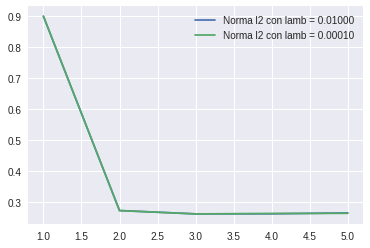

In [393]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig2 = plt.figure()
ax = plt.subplot(111)

lambdas = [0.01,0.0001]
for lamb in lambdas:
    Iteracion=[]
    MSE = []
    for m_degree in range(1,6):
        #print m_degree
        X_train = x_train.as_matrix()    
        theta_map, X_train= reggresion_L2(X_train,degree=m_degree,lambda_const=lamb)
        print X_train.shape
        print ("================================================================")
        print ("Los parametros obtenidos usando norma l2 con lamba =%.5f " %lamb)
        print ("Utilizando expansión del polinomio de grado=%i" %m_degree)
        print (theta_map)
        X_test= x_test.as_matrix()
        phi_X_test= np.insert(X_test,0,1.0,axis=1)
        phi_X_test = polynomial_expansion(phi_X_test, m_degree)
        y_test_hat_l2 = (np.sum(phi_X_test*theta_map.T,axis=1))
        y_test_hat_l2 = y_test_hat_l2.reshape(200,1)
        sse_test = np.square(y_test- y_test_hat_l2).sum()
        mse_test_l2 = sse_test / X_test.shape[0]
        print ("El error promedio es : %.5f" %mse_test_l2)
        print ("\n")
        print ("================================================================")
        Iteracion.append(m_degree)
        MSE.append(mse_test_l2[0]) 
    #print Iteracion
    #print MSE
    plt.plot(Iteracion, MSE,label='Norma l2 con lamb = %.5f' %lamb)
ax.legend()
plt.show()


In [394]:
from sklearn.linear_model import Ridge
import numpy as np 

X_train = x_train.as_matrix()
X_test = x_test.as_matrix()

phi_X_train = np.insert(X_train,0,1.0,axis=1)
phi_X_train = polynomial_expansion(phi_X_train, 5)


phi_X_test= np.insert(X_test,0,1.0,axis=1)
phi_X_test = polynomial_expansion(phi_X_test, 5)

clf=Ridge(alpha=0.0001,fit_intercept=False)
clf.fit(phi_X_train,y_train) 

print ("Los párametros encontrados usando norma l2 son los siguientes") 
print clf.coef_

Los párametros encontrados usando norma l2 son los siguientes
[[  1.57803342e+00  -7.69107486e-01  -2.11438669e+01   1.57803344e+00
   -6.21439305e-01   2.78437469e+01   1.57803344e+00   7.16884024e-02
   -1.72087389e+01   1.57803345e+00   2.99910484e-04   4.96863201e+00
    1.57803350e+00  -2.15703947e-03  -5.42097560e-01]]


In [395]:
#y_train_hat_l2_sk = clf.predict(phi_X_train)
y_test_hat_l2_sk = clf.predict(phi_X_test)


#sse_train_l2_sk = (np.square(y_train - y_train_hat_l2_sk).sum())/phi_X_train.shape[0]
sse_test_l2_sk = (np.square(y_test- y_test_hat_l2_sk).sum())/phi_X_test.shape[0]

#print ("===El error promedio para los datos de entrenamiento es el siguiente===")
#print sse_train_l2_sk[0]

print ("\n")

print ("===El error promedio para los datos de validación es el siguiente===")
print sse_test_l2_sk[0]



===El error promedio para los datos de validación es el siguiente===
0.264404911805


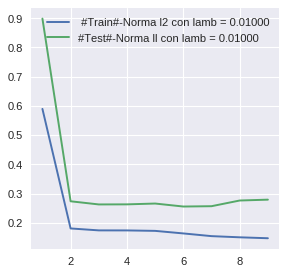

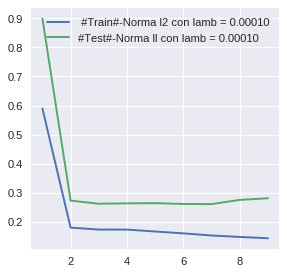

In [414]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


lambdas = [0.01,0.0001]
for lamb in lambdas:
    fig = plt.figure(num=None, figsize=(4,4), dpi=80, facecolor='w', edgecolor='k')
    ax = plt.subplot(111)
    ax.set_yscale('linear')
    Iteracion=[]
    MSE = []
    Iteracion_test=[]
    MSE_test = []    
    for m_degree in range(1,10):
        #print m_degree
        X_train = x_train.as_matrix()    
        theta_map, X_train= reggresion_L2(X_train,degree=m_degree,lambda_const=lamb)
       
        y_train_hat_l2 = (np.sum(X_train*theta_map.T,axis=1))
        y_train_hat_l2 = y_train_hat_l2.reshape(200,1)
        sse_train = np.square(y_train - y_train_hat_l2).sum()
        mse_train_l2 = sse_train / X_train.shape[0]
        Iteracion.append(m_degree)
        MSE.append(mse_train_l2[0]) 
        
        X_test= x_test.as_matrix()
        phi_X_test= np.insert(X_test,0,1.0,axis=1)
        phi_X_test = polynomial_expansion(phi_X_test, m_degree)
        y_test_hat_l2 = (np.sum(phi_X_test*theta_map.T,axis=1))
        y_test_hat_l2 = y_test_hat_l2.reshape(200,1)
        sse_test = np.square(y_test- y_test_hat_l2).sum()
        mse_test_l2 = sse_test / X_test.shape[0]
      
        Iteracion_test.append(m_degree)
        MSE_test.append(mse_test_l2[0]) 
    #print Iteracion
    #print MSE
    plt.plot(Iteracion, MSE,label=' #Train#-Norma l2 con lamb = %.5f' %lamb)
    plt.plot(Iteracion_test, MSE_test,label='#Test#-Norma ll con lamb = %.5f' %lamb)
    ax.legend()
    plt.show()


## Observacciones:

* Agragar el titulo a la gráfica anterior.
* Agreager el comportamiento a los distintos modelos implementados.